In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [187]:
x_train = h5py.File("./data/X_train.h5", "r")
y_train = pd.read_csv("./data/y_train.csv").values[:, 1].squeeze()

In [188]:
x_train = x_train["features"][:100000, 11:]
y_train = y_train[:10000]

In [95]:
def print_eeg_label(label):
    valid = x_train[y_train == label]
    eeg = valid[np.random.randint(valid.shape[0])][11:]
    plt.plot(eeg)

In [5]:
def print_eeg_fft(label):
    valid = x_train[y_train == label]
    eeg   = valid[np.random.randint(valid.shape[0])][11:]
    freq  = np.fft.fftfreq(eeg.shape[0]) 
    plt.plot(freq*125, np.abs(np.fft.fft(eeg)))

In [189]:
maxis = np.max(np.abs(x_train[:, 11:]), axis = -1)
mean  = np.mean(np.abs(x_train[:, 11:]), axis = -1)

In [190]:
maxis.mean()

130.24835340836495

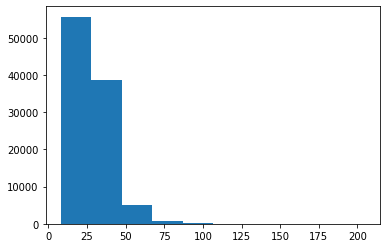

In [191]:
_ = plt.hist(mean)

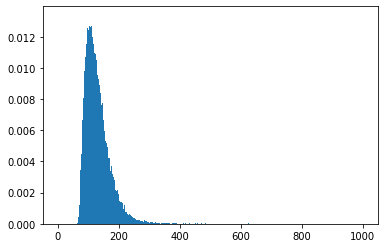

In [192]:
prob, _, u = plt.hist(maxis, bins = range(0, 1000), density = True)

In [193]:
np.sum(prob[:205])

0.9488048804880489

In [194]:
x_train = np.clip(x_train, -205, 205)

In [197]:
x_train = 2*((x_train + 205) / 410) - 1

In [198]:
x_train

array([[-1.        , -1.        , -1.        , ..., -0.00591407,
        -0.01200945, -0.02405072],
       [ 0.15995349,  0.13622527,  0.10526809, ...,  0.03828471,
         0.01967569, -0.01029291],
       [-0.0078824 , -0.01082598, -0.04167402, ..., -0.06275077,
        -0.05829842, -0.02698439],
       ...,
       [ 0.40950308,  0.4529754 ,  0.45304307, ...,  0.03772954,
         0.06236977, -0.01656109],
       [ 0.84510188,  0.81360654,  0.78907857, ..., -0.04092669,
        -0.01446088,  0.00656508],
       [ 0.02328443, -0.00715044,  0.01424072, ..., -0.06175818,
        -0.08623883, -0.04997676]])